# Twitter Sentiment Analysis

In [41]:
# import the libraries
import tweepy
import re
import pickle
from tweepy import OAuthHandler

In [42]:
# initializing the keys
consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'

In [43]:
# client authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['google'] 
api = tweepy.API(auth, timeout=10)

In [44]:
# fetching real time tweets
list_tweets = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search, q=query+" -filter:retweets", lang='eng', result_type='recent').items(100):
        list_tweets.append(status.text)

In [45]:
# Loading TF-IDF model 
with open('tfidfmodel.pickle', 'rb') as f:
    vectorizer = pickle.load(f)
    
with open('classifier.pickle', 'rb') as f:
    clf = pickle.load(f)

In [46]:
total_pos = 0
total_neg = 0

# Preprocessing the tweets and predicting sentiment
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    clf.predict(vectorizer.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

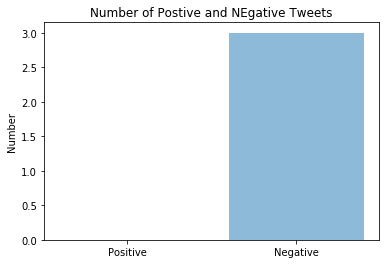

In [47]:
# plotting the Result
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()